In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Analysis WITH SAND (coarse GSD)

In [2]:
# directory where the CSV files are located
folder_path = "with_sand"

# list all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# loop through each CSV file and read it into a DataFrame and create variables
for csv_file in csv_files:
    file_name = os.path.splitext(csv_file)[0]  # Get the file name without the extension
    file_path = os.path.join(folder_path, csv_file)
    # create a variable with the file name and store the DataFrame
    exec(f"{file_name} = pd.read_csv(file_path)")


Calculate statistical values for confidence intervals: (note - I did this linearly, consider converting to phi scale, interpolate and convert back to mm)

In [3]:
# list of desired percentiles (from 5 to 95 in intervals of 5)
percentiles = list(range(5, 100, 5))

# inverting the dataframe so interpolation doesnt explode
percent_finer = percent_finer[::-1]
percent_finer.set_index("Sieve Size (mm)", inplace=True)

# interpolate the data to calculate percentiles
percentile_values = pd.DataFrame() # empty df
percentile_values['Percentiles'] = percentiles # changing the column name
percentile_values.set_index("Percentiles", inplace=True) # make it the index

for column_name in percent_finer.columns: 
    interp = np.interp(percentiles, percent_finer[column_name], percent_finer.index)
    percentile_values[column_name] = interp

In [4]:
# will now get the standard deviation for each 
means = []
for column_name in percentile_values.columns: 
    mean_size = percentile_values[column_name].mean() # calculate the mean for each column
    means.append(mean_size)

means = pd.DataFrame(means).T
means.index = ['average grain size (mm)']
means.columns = percentile_values.columns

# get the squared differences
variances = []
for column_name in percentile_values.columns:
    value_to_subtract = means.at['average grain size (mm)', column_name]
    sqdiff = (percentile_values[column_name] - value_to_subtract)**2
    variance = np.mean(sqdiff)
    variances.append(variance)

std = np.sqrt(variances) 
print(std)

standard_dev = pd.DataFrame(std).T
standard_dev.index = ['standard deviation']
standard_dev.columns = percentile_values.columns

[1.37588891 1.42526122 1.42004734 1.32168942 1.41162726 1.3527325
 1.41828002 1.42695715 1.42752235 1.36314278 1.44036954 1.4338885
 1.39048556 1.43184448 1.41177785 1.42993126 1.41513576 1.41293269
 1.40284874 1.36738704 1.39262939 1.4101549  1.41498022]


In [5]:
std_df = percentile_values.copy()
for column_name in percentile_values.columns:
    value_to_change = standard_dev.at['standard deviation', column_name]
    std_df[column_name] = value_to_change

upper_limit = percentile_values + std_df
lower_limit = percentile_values - std_df

GSD plot: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


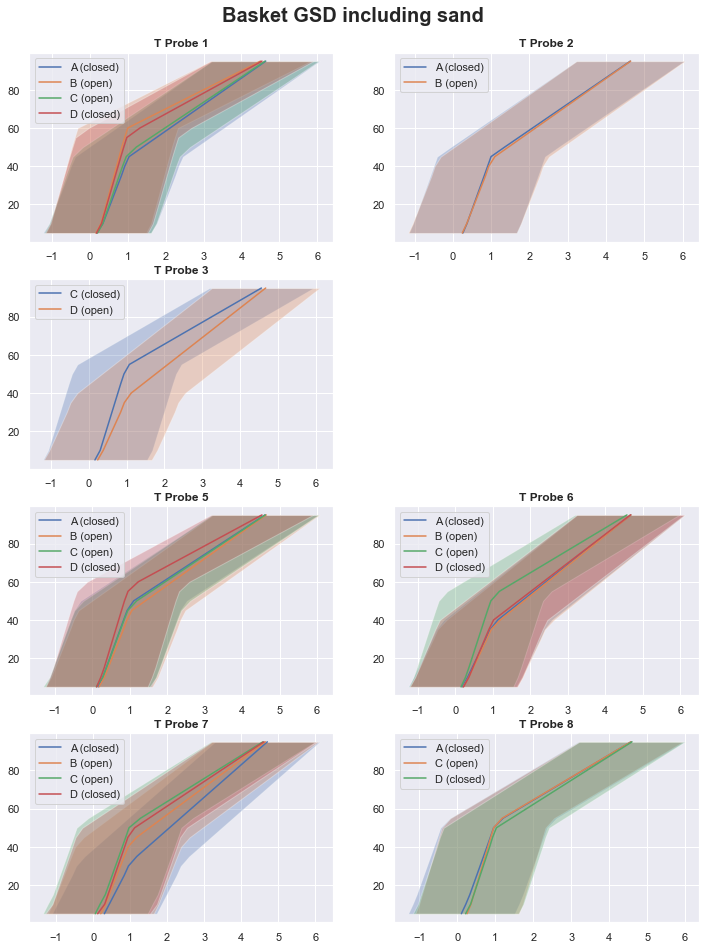

In [6]:
# sort the DataFrame by sieve size
df = percentile_values
sns.set_theme()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
ax5 = axes[2, 0]
ax6 = axes[2, 1]
ax7 = axes[3, 0]
ax8 = axes[3, 1]

# T1 (25)
ax1.plot(df['T25A'], df.index, label='A (closed)')
ax1.fill_betweenx(df.index, lower_limit['T25A'], upper_limit['T25A'], alpha=0.3)
ax1.plot(df['T25B'], df.index, label='B (open)')
ax1.fill_betweenx(df.index, lower_limit['T25B'], upper_limit['T25B'], alpha=0.3)
ax1.plot(df['T25C'], df.index, label='C (open)')
ax1.fill_betweenx(df.index, lower_limit['T25C'], upper_limit['T25C'], alpha=0.3)
ax1.plot(df['T25D'], df.index, label='D (closed)')
ax1.fill_betweenx(df.index, lower_limit['T25D'], upper_limit['T25D'], alpha=0.3)

# T2 (8)
ax2.plot(df['T8A'], df.index, label='A (closed)')
ax2.fill_betweenx(df.index, lower_limit['T8A'], upper_limit['T8A'], alpha=0.3)
ax2.plot(df['T8B'], df.index, label='B (open)')
ax2.fill_betweenx(df.index, lower_limit['T8B'], upper_limit['T8B'], alpha=0.3)

# T3 (0)
ax3.plot(df['T0C'], df.index, label='C (closed)')
ax3.fill_betweenx(df.index, lower_limit['T0C'], upper_limit['T0C'], alpha=0.3)
ax3.plot(df['T0D'], df.index, label='D (open)')
ax3.fill_betweenx(df.index, lower_limit['T0D'], upper_limit['T0D'], alpha=0.3)

# T5 (4)
ax5.plot(df['T4A'], df.index, label='A (closed)')
ax5.fill_betweenx(df.index, lower_limit['T4A'], upper_limit['T4A'], alpha=0.3)
ax5.plot(df['T4B'], df.index, label='B (open)')
ax5.fill_betweenx(df.index, lower_limit['T4B'], upper_limit['T4B'], alpha=0.3)
ax5.plot(df['T4C'], df.index, label='C (open)')
ax5.fill_betweenx(df.index, lower_limit['T4C'], upper_limit['T4C'], alpha=0.3)
ax5.plot(df['T4D'], df.index, label='D (closed)')
ax5.fill_betweenx(df.index, lower_limit['T4D'], upper_limit['T4D'], alpha=0.3)

# T6 (5)
ax6.plot(df['T5A'], df.index, label='A (closed)')
ax6.fill_betweenx(df.index, lower_limit['T5A'], upper_limit['T5A'], alpha=0.3)
ax6.plot(df['T5B'], df.index, label='B (open)')
ax6.fill_betweenx(df.index, lower_limit['T5B'], upper_limit['T5B'], alpha=0.3)
ax6.plot(df['T5C'], df.index, label='C (open)')
ax6.fill_betweenx(df.index, lower_limit['T5C'], upper_limit['T5C'], alpha=0.3)
ax6.plot(df['T5D'], df.index, label='D (closed)')
ax6.fill_betweenx(df.index, lower_limit['T5D'], upper_limit['T5D'], alpha=0.3)

# T7 (6)
ax7.plot(df['T6A'], df.index, label='A (closed)')
ax7.fill_betweenx(df.index, lower_limit['T6A'], upper_limit['T6A'], alpha=0.3)
ax7.plot(df['T6B'], df.index, label='B (open)')
ax7.fill_betweenx(df.index, lower_limit['T6B'], upper_limit['T6B'], alpha=0.3)
ax7.plot(df['T6C'], df.index, label='C (open)')
ax7.fill_betweenx(df.index, lower_limit['T6C'], upper_limit['T6C'], alpha=0.3)
ax7.plot(df['T6D'], df.index, label='D (closed)')
ax7.fill_betweenx(df.index, lower_limit['T6D'], upper_limit['T6D'], alpha=0.3)

# T8 (7)
ax8.plot(df['T7A'], df.index, label='A (closed)')
ax8.fill_betweenx(df.index, lower_limit['T7A'], upper_limit['T7A'], alpha=0.3)
ax8.plot(df['T7C'], df.index, label='C (open)')
ax8.fill_betweenx(df.index, lower_limit['T7C'], upper_limit['T7C'], alpha=0.3)
ax8.plot(df['T7D'], df.index, label='D (closed)')
ax8.fill_betweenx(df.index, lower_limit['T7D'], upper_limit['T7D'], alpha=0.3)


# set labels, title, scale and set the same y-axis limits for all subplots
title_font = {'weight': 'bold', 'size': 12}
fig.delaxes(ax4)
fig.suptitle('Basket GSD including sand', fontsize=20, fontweight='bold', x=0.5, y=0.92)
min_y = min(df.min())
max_y = max(df.max())
for i, ax in enumerate(axes.flat):
    ax.set_title(f'T Probe {i + 1}', fontdict=title_font)
    ax.legend(loc='best')
    #ax.set_xscale('log')
    #ax.set_ylim(min_y, max_y)

# show the plot
plt.savefig('GSD_withsand.png')
plt.show()


### Analysis NO SAND

In [7]:
# directory where the CSV files are located
folder_path = "no_sand"

# list all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# loop through each CSV file and read it into a DataFrame and create variables
for csv_file in csv_files:
    file_name = os.path.splitext(csv_file)[0]  # Get the file name without the extension
    file_path = os.path.join(folder_path, csv_file)
    # create a variable with the file name and store the DataFrame
    exec(f"{file_name} = pd.read_csv(file_path)")

In [8]:
# list of desired percentiles (from 5 to 95 in intervals of 5)
percentiles = list(range(5, 100, 5))
# inverting the dataframe so interpolation doesnt explode
percent_finer_nosand = percent_finer_nosand[::-1]
percent_finer_nosand.set_index("Sieve Size (mm)", inplace=True)

# interpolate the data to calculate percentiles
percentile_nosand = pd.DataFrame() # empty df
percentile_nosand['Percentiles'] = percentiles # changing the column name
percentile_nosand.set_index("Percentiles", inplace=True) # make it the index

for column_name in percent_finer_nosand.columns: 
    interp = np.interp(percentiles, percent_finer_nosand[column_name], percent_finer_nosand.index)
    percentile_nosand[column_name] = interp

In [9]:
# will now get the standard deviation for each basket
means = []
for column_name in percentile_nosand.columns: 
    mean_size = percentile_nosand[column_name].mean() # calculate the mean for each column
    means.append(mean_size) # adding it to our list of means

means = pd.DataFrame(means).T # transposing it so it is a long row
means.index = ['average grain size (mm)']
means.columns = percentile_nosand.columns # each column is the name of the corresponding basket

# get the squared differences
variances = []
for column_name in percentile_nosand.columns:
    value_to_subtract = means.at['average grain size (mm)', column_name]
    sqdiff = (percentile_nosand[column_name] - value_to_subtract)**2
    variance = np.mean(sqdiff)
    variances.append(variance)

std = np.sqrt(variances) 
print(variances)

standard_dev = pd.DataFrame(std).T
standard_dev.index = ['standard deviation']
standard_dev.columns = percentile_nosand.columns

[0.0002141484891934449, 0.00026563621500077535, 0.0003165148617037361, 0.0002259772127127461, 0.00026464095235982486, 0.000158463257926941, 0.00018277738404550494, 0.0002489586278781897, 0.0001338592774407779, 0.0002425204121512838, 0.00010502496298492644, 0.00011468958313365482, 0.00014060747023254862, 0.00025614178343256886, 0.00018738125259088115, 0.0001267394489507689, 0.0002338464511741803, 0.00015088729420889463, 0.000146499986646569, 0.00017584013296267854, 0.00018091803389166212, 0.00019282179807522838, 0.0001503929632016764]


Determine the lower and upper limits

In [10]:
std_df = percentile_nosand.copy()
for column_name in percentile_nosand.columns:
    value_to_change = standard_dev.at['standard deviation', column_name]
    std_df[column_name] = value_to_change

upper_limit = percentile_nosand + std_df
lower_limit = percentile_nosand - std_df

plotting!! <33

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


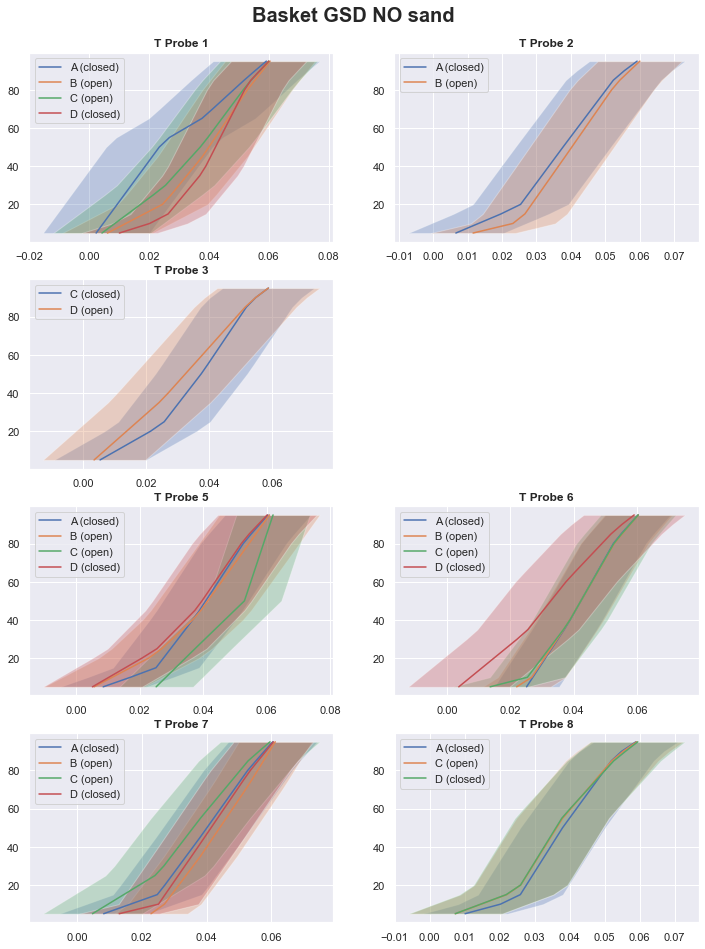

In [11]:
# sort the DataFrame by sieve size
df = percentile_nosand
sns.set_theme()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
ax5 = axes[2, 0]
ax6 = axes[2, 1]
ax7 = axes[3, 0]
ax8 = axes[3, 1]

# T1 (25)
ax1.plot(df['T25A'], df.index, label='A (closed)')
ax1.fill_betweenx(df.index, lower_limit['T25A'], upper_limit['T25A'], alpha=0.3)
ax1.plot(df['T25B'], df.index, label='B (open)')
ax1.fill_betweenx(df.index, lower_limit['T25B'], upper_limit['T25B'], alpha=0.3)
ax1.plot(df['T25C'], df.index, label='C (open)')
ax1.fill_betweenx(df.index, lower_limit['T25C'], upper_limit['T25C'], alpha=0.3)
ax1.plot(df['T25D'], df.index, label='D (closed)')
ax1.fill_betweenx(df.index, lower_limit['T25D'], upper_limit['T25D'], alpha=0.3)

# T2 (8)
ax2.plot(df['T8A'], df.index, label='A (closed)')
ax2.fill_betweenx(df.index, lower_limit['T8A'], upper_limit['T8A'], alpha=0.3)
ax2.plot(df['T8B'], df.index, label='B (open)')
ax2.fill_betweenx(df.index, lower_limit['T8B'], upper_limit['T8B'], alpha=0.3)

# T3 (0)
ax3.plot(df['T0C'], df.index, label='C (closed)')
ax3.fill_betweenx(df.index, lower_limit['T0C'], upper_limit['T0C'], alpha=0.3)
ax3.plot(df['T0D'], df.index, label='D (open)')
ax3.fill_betweenx(df.index, lower_limit['T0D'], upper_limit['T0D'], alpha=0.3)

# T5 (4)
ax5.plot(df['T4A'], df.index, label='A (closed)')
ax5.fill_betweenx(df.index, lower_limit['T4A'], upper_limit['T4A'], alpha=0.3)
ax5.plot(df['T4B'], df.index, label='B (open)')
ax5.fill_betweenx(df.index, lower_limit['T4B'], upper_limit['T4B'], alpha=0.3)
ax5.plot(df['T4C'], df.index, label='C (open)')
ax5.fill_betweenx(df.index, lower_limit['T4C'], upper_limit['T4C'], alpha=0.3)
ax5.plot(df['T4D'], df.index, label='D (closed)')
ax5.fill_betweenx(df.index, lower_limit['T4D'], upper_limit['T4D'], alpha=0.3)

# T6 (5)
ax6.plot(df['T5A'], df.index, label='A (closed)')
ax6.fill_betweenx(df.index, lower_limit['T5A'], upper_limit['T5A'], alpha=0.3)
ax6.plot(df['T5B'], df.index, label='B (open)')
ax6.fill_betweenx(df.index, lower_limit['T5B'], upper_limit['T5B'], alpha=0.3)
ax6.plot(df['T5C'], df.index, label='C (open)')
ax6.fill_betweenx(df.index, lower_limit['T5C'], upper_limit['T5C'], alpha=0.3)
ax6.plot(df['T5D'], df.index, label='D (closed)')
ax6.fill_betweenx(df.index, lower_limit['T5D'], upper_limit['T5D'], alpha=0.3)

# T7 (6)
ax7.plot(df['T6A'], df.index, label='A (closed)')
ax7.fill_betweenx(df.index, lower_limit['T6A'], upper_limit['T6A'], alpha=0.3)
ax7.plot(df['T6B'], df.index, label='B (open)')
ax7.fill_betweenx(df.index, lower_limit['T6B'], upper_limit['T6B'], alpha=0.3)
ax7.plot(df['T6C'], df.index, label='C (open)')
ax7.fill_betweenx(df.index, lower_limit['T6C'], upper_limit['T6C'], alpha=0.3)
ax7.plot(df['T6D'], df.index, label='D (closed)')
ax7.fill_betweenx(df.index, lower_limit['T6D'], upper_limit['T6D'], alpha=0.3)

# T8 (7)
ax8.plot(df['T7A'], df.index, label='A (closed)')
ax8.fill_betweenx(df.index, lower_limit['T7A'], upper_limit['T7A'], alpha=0.3)
ax8.plot(df['T7C'], df.index, label='C (open)')
ax8.fill_betweenx(df.index, lower_limit['T7C'], upper_limit['T7C'], alpha=0.3)
ax8.plot(df['T7D'], df.index, label='D (closed)')
ax8.fill_betweenx(df.index, lower_limit['T7D'], upper_limit['T7D'], alpha=0.3)

# set labels, title, scale and set the same y-axis limits for all subplots
title_font = {'weight': 'bold', 'size': 12}
fig.delaxes(ax4)
fig.suptitle('Basket GSD NO sand', fontsize=20, fontweight='bold', x=0.5, y=0.92)
min_y = min(df.min())
max_y = max(df.max())
for i, ax in enumerate(axes.flat):
    ax.set_title(f'T Probe {i + 1}', fontdict=title_font)
    ax.legend(loc='best')
    #ax.set_xscale('log')
    #ax.set_ylim(min_y, max_y)

# show the plot
plt.savefig('GSD_nosand.png')
plt.show()

Lastly, we will also conduct the same analysis with the grain size distributions obtained with the LISST portable
### LISST: 
Note: consider adding the replicate samples that you took for each basket. This analysis was done with just the first run of an analysis

In [18]:
# directory where the CSV files are located
folder_path = "LISST"

# list all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# loop through each CSV file and read it into a DataFrame and create variables
for csv_file in csv_files:
    file_name = os.path.splitext(csv_file)[0]  # Get the file name without the extension
    file_path = os.path.join(folder_path, csv_file)
    # create a variable with the file name and store the DataFrame
    exec(f"{file_name} = pd.read_csv(file_path)")

In [19]:
# list of desired percentiles (from 5 to 95 in intervals of 5)
percentiles = list(range(5, 100, 1))
# setting the sizes as the index
LISST_cumconc.set_index("Size (um)", inplace=True)

# interpolate the data to calculate percentiles
percentile_LISST = pd.DataFrame() # empty df
percentile_LISST['Percentiles'] = percentiles # changing the column name
percentile_LISST.set_index("Percentiles", inplace=True) # make it the index

for column_name in LISST_cumconc.columns: 
    interp = np.interp(percentiles, LISST_cumconc[column_name], LISST_cumconc.index)
    percentile_LISST[column_name] = interp # this adds the column name and results to the new df 

In [20]:
percentile_LISST

,T0C,T0D,T25A,T25B,T25C,T25D,T4A,T4B,T4C,T4D,...,T5D,T6A,T6B,T6C,T6D,T7A,T7C,T7D,T8A,T8B
Percentiles,,,,,,,,,,,,,,,,,,,,,
5,8.040769,7.095970,9.794000,6.437744,9.352000,6.735000,8.465290,8.359153,6.726923,9.238197,...,6.136563,7.890000,9.133380,9.183684,8.110845,6.968154,8.415806,6.854848,6.572353,7.017869
6,10.106000,8.845000,12.442169,6.749721,12.022941,8.540000,10.003529,10.797778,8.521667,11.794444,...,7.700244,9.939600,11.327143,11.210000,9.968571,8.738636,10.573721,8.614324,8.267895,8.906709
7,12.191963,10.624902,15.007692,7.061699,14.617670,10.467204,12.321250,13.383373,10.444894,14.242261,...,9.337742,12.029091,13.475392,13.125726,11.826970,10.513689,12.672870,10.503617,10.048621,10.875532
8,14.220000,12.423525,17.437674,14.382909,17.080687,12.434071,14.561333,15.996327,12.401892,16.468348,...,11.035421,14.076698,15.540635,14.929189,13.590000,12.293040,14.640571,12.464273,11.901313,12.818142
9,16.159394,14.202213,19.786512,16.710182,19.393664,14.347092,16.694667,18.640526,14.351765,18.577103,...,12.750551,16.037405,17.523208,16.658919,15.263567,14.029040,16.469143,14.440000,13.786000,14.706761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,357.072335,366.390720,375.496652,368.573770,348.666341,334.346286,367.458642,409.156463,362.120825,376.263461,...,303.474879,313.787465,323.942174,289.834928,281.389742,322.817964,226.273010,374.873233,335.850149,293.906438
96,374.892695,382.262720,388.962715,382.512881,366.812683,355.603429,381.397752,419.379170,377.461031,389.638742,...,323.809556,338.729655,346.525378,314.197246,307.384588,345.272821,248.035000,387.618415,358.059104,316.933836
97,393.384286,400.244359,406.522551,399.376936,384.959024,376.860571,397.935680,429.601878,394.015283,407.199471,...,350.164532,368.049852,371.533782,341.680000,334.512195,370.708718,276.913378,404.970787,380.268060,344.385455


In [21]:
# will now get the standard deviation for each basket
means = []
for column_name in percentile_LISST.columns: 
    mean_size = percentile_LISST[column_name].mean() # calculate the mean for each column
    means.append(mean_size) # adding it to our list of means

means = pd.DataFrame(means).T # transposing it so it is a long row
means.index = ['average grain size (mm)']
means.columns = percentile_LISST.columns # each column is the name of the corresponding basket

# get the squared differences
variances = []
for column_name in percentile_LISST.columns:
    value_to_subtract = means.at['average grain size (mm)', column_name]
    sqdiff = (percentile_LISST[column_name] - value_to_subtract)**2
    variance = np.mean(sqdiff)
    variances.append(variance)

std = np.sqrt(variances) 
#print(standard_dev)

standard_dev = pd.DataFrame(std).T
standard_dev.index = ['standard deviation']
standard_dev.columns = percentile_LISST.columns

Determine the lower and upper limits

In [22]:
std_df = percentile_LISST.copy()
for column_name in percentile_LISST.columns:
    value_to_change = standard_dev.at['standard deviation', column_name]
    std_df[column_name] = value_to_change

upper_limit = percentile_LISST + std_df
lower_limit = percentile_LISST - std_df

Test: Checking to see if it's the same to plot the interpolated percentiles v/s the actual distribution (we can check this because we have more data points now)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


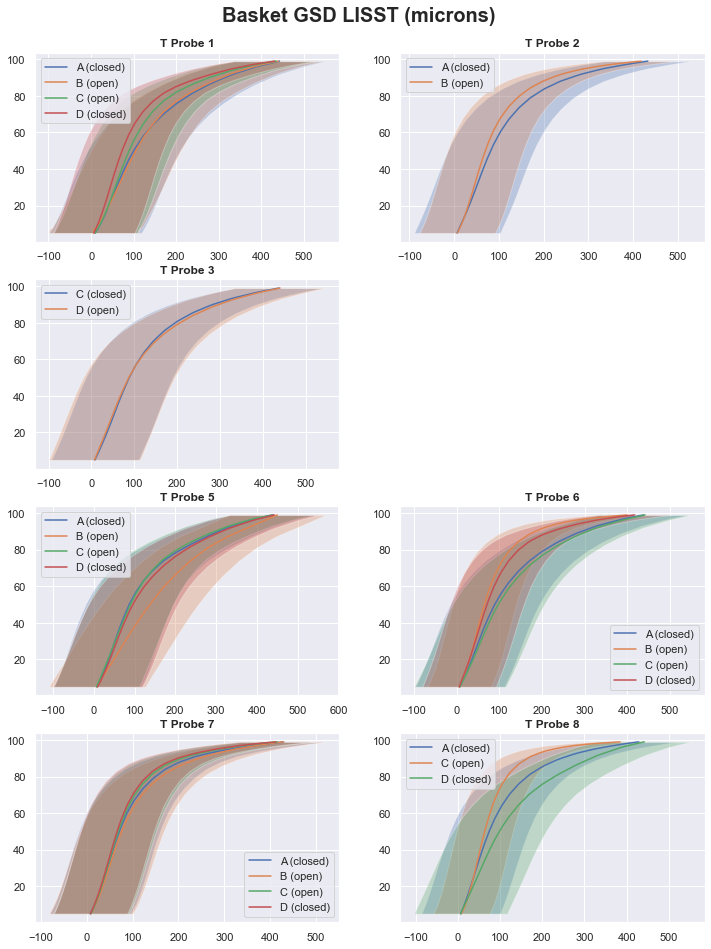

In [23]:
# sort the DataFrame by sieve size
df = percentile_LISST
sns.set_theme()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
ax5 = axes[2, 0]
ax6 = axes[2, 1]
ax7 = axes[3, 0]
ax8 = axes[3, 1]

# T1 (25)
ax1.plot(df['T25A'], df.index, label='A (closed)')
ax1.fill_betweenx(df.index, lower_limit['T25A'], upper_limit['T25A'], alpha=0.3)
ax1.plot(df['T25B'], df.index, label='B (open)')
ax1.fill_betweenx(df.index, lower_limit['T25B'], upper_limit['T25B'], alpha=0.3)
ax1.plot(df['T25C'], df.index, label='C (open)')
ax1.fill_betweenx(df.index, lower_limit['T25C'], upper_limit['T25C'], alpha=0.3)
ax1.plot(df['T25D'], df.index, label='D (closed)')
ax1.fill_betweenx(df.index, lower_limit['T25D'], upper_limit['T25D'], alpha=0.3)

# T2 (8)
ax2.plot(df['T8A'], df.index, label='A (closed)')
ax2.fill_betweenx(df.index, lower_limit['T8A'], upper_limit['T8A'], alpha=0.3)
ax2.plot(df['T8B'], df.index, label='B (open)')
ax2.fill_betweenx(df.index, lower_limit['T8B'], upper_limit['T8B'], alpha=0.3)

# T3 (0)
ax3.plot(df['T0C'], df.index, label='C (closed)')
ax3.fill_betweenx(df.index, lower_limit['T0C'], upper_limit['T0C'], alpha=0.3)
ax3.plot(df['T0D'], df.index, label='D (open)')
ax3.fill_betweenx(df.index, lower_limit['T0D'], upper_limit['T0D'], alpha=0.3)

# T5 (4)
ax5.plot(df['T4A'], df.index, label='A (closed)')
ax5.fill_betweenx(df.index, lower_limit['T4A'], upper_limit['T4A'], alpha=0.3)
ax5.plot(df['T4B'], df.index, label='B (open)')
ax5.fill_betweenx(df.index, lower_limit['T4B'], upper_limit['T4B'], alpha=0.3)
ax5.plot(df['T4C'], df.index, label='C (open)')
ax5.fill_betweenx(df.index, lower_limit['T4C'], upper_limit['T4C'], alpha=0.3)
ax5.plot(df['T4D'], df.index, label='D (closed)')
ax5.fill_betweenx(df.index, lower_limit['T4D'], upper_limit['T4D'], alpha=0.3)

# T6 (5)
ax6.plot(df['T5A'], df.index, label='A (closed)')
ax6.fill_betweenx(df.index, lower_limit['T5A'], upper_limit['T5A'], alpha=0.3)
ax6.plot(df['T5B'], df.index, label='B (open)')
ax6.fill_betweenx(df.index, lower_limit['T5B'], upper_limit['T5B'], alpha=0.3)
ax6.plot(df['T5C'], df.index, label='C (open)')
ax6.fill_betweenx(df.index, lower_limit['T5C'], upper_limit['T5C'], alpha=0.3)
ax6.plot(df['T5D'], df.index, label='D (closed)')
ax6.fill_betweenx(df.index, lower_limit['T5D'], upper_limit['T5D'], alpha=0.3)

# T7 (6)
ax7.plot(df['T6A'], df.index, label='A (closed)')
ax7.fill_betweenx(df.index, lower_limit['T6A'], upper_limit['T6A'], alpha=0.3)
ax7.plot(df['T6B'], df.index, label='B (open)')
ax7.fill_betweenx(df.index, lower_limit['T6B'], upper_limit['T6B'], alpha=0.3)
ax7.plot(df['T6C'], df.index, label='C (open)')
ax7.fill_betweenx(df.index, lower_limit['T6C'], upper_limit['T6C'], alpha=0.3)
ax7.plot(df['T6D'], df.index, label='D (closed)')
ax7.fill_betweenx(df.index, lower_limit['T6D'], upper_limit['T6D'], alpha=0.3)

# T8 (7)
ax8.plot(df['T7A'], df.index, label='A (closed)')
ax8.fill_betweenx(df.index, lower_limit['T7A'], upper_limit['T7A'], alpha=0.3)
ax8.plot(df['T7C'], df.index, label='C (open)')
ax8.fill_betweenx(df.index, lower_limit['T7C'], upper_limit['T7C'], alpha=0.3)
ax8.plot(df['T7D'], df.index, label='D (closed)')
ax8.fill_betweenx(df.index, lower_limit['T7D'], upper_limit['T7D'], alpha=0.3)

# set labels, title, scale and set the same y-axis limits for all subplots
title_font = {'weight': 'bold', 'size': 12}
fig.delaxes(ax4)
fig.suptitle('Basket GSD LISST (microns)', fontsize=20, fontweight='bold', x=0.5, y=0.92)
min_y = min(df.min())
max_y = max(df.max())
for i, ax in enumerate(axes.flat):
    ax.set_title(f'T Probe {i + 1}', fontdict=title_font)
    ax.legend(loc='best')
    #ax.set_xscale('log')
    #ax.set_ylim(min_y, max_y)

# show the plot
plt.savefig('GSD_LISST(percentiles).png')
plt.show()

This is the version github pilot made for me :)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


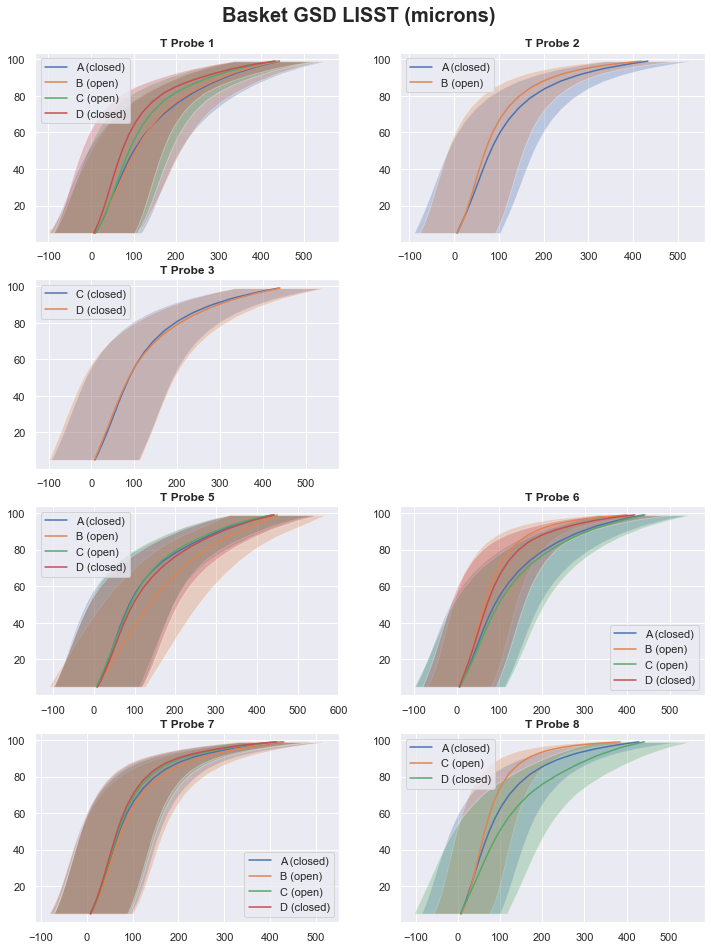

In [32]:
df = percentile_LISST
sns.set_theme()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

# remove the unused subplot
fig.delaxes(axes[1, 1])

# define a function to plot and fill data
def plot_fill(ax, data, lower, upper, label):
    ax.plot(data, df.index, label=label)
    ax.fill_betweenx(df.index, lower, upper, alpha=0.3)

# define the data for each subplot
data = [
    ('T25A', 'T25B', 'T25C', 'T25D'),
    ('T8A', 'T8B'),
    ('T0C', 'T0D'),
    ('T4A', 'T4B', 'T4C', 'T4D'),
    ('T5A', 'T5B', 'T5C', 'T5D'),
    ('T6A', 'T6B', 'T6C', 'T6D'),
    ('T7A', 'T7C', 'T7D')
]

labels = [
    ('A (closed)', 'B (open)', 'C (open)', 'D (closed)'), #T25 A B C D 
    ('A (closed)', 'B (open)'),                           #T8 A B
    ('C (closed)', 'D (closed)'),                         #T0 C D 
    ('A (closed)', 'B (open)', 'C (open)', 'D (closed)'), #T4 A B C D 
    ('A (closed)', 'B (open)', 'C (open)', 'D (closed)'), #T5 A B C D 
    ('A (closed)', 'B (open)', 'C (open)', 'D (closed)'), #T6 A B C D 
    ('A (closed)', 'C (open)', 'D (closed)')              #T7 A C D
]

# create a new list of axes, excluding the deleted one
axes_list = list(axes.flat)
del axes_list[3]  # delete the fourth subplot

# plot and fill data for each subplot
for ax, d, lbl in zip(axes_list, data, labels):
    for label, legend_label in zip(d, lbl):
        plot_fill(ax, df[label], lower_limit[label], upper_limit[label], legend_label)
        ax.legend(loc='best', labels=legend_label)

# set labels, title, scale and set the same y-axis limits for all subplots
title_font = {'weight': 'bold', 'size': 12}
fig.suptitle('Basket GSD LISST (microns)', fontsize=20, fontweight='bold', x=0.5, y=0.92)
min_y = min(df.min())
max_y = max(df.max())
for i, ax in enumerate(axes.flat):
    ax.set_title(f'T Probe {i + 1}', fontdict=title_font)
    ax.legend(loc='best')

# show the plot
plt.savefig('GSD_LISST(percentiles).png')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import binom

def WolmanCI(cfd, n, P=np.arange(5, 100, 5), equaltail=True, alpha=0.05):
    # convert percentiles to probabilities
    probs = P / 100

    p_upper = np.zeros(len(probs))
    p_lower = np.zeros(len(probs))

    if equaltail:
        for i, prob in enumerate(probs):
            interval = binom.interval(alpha, n, prob)
            p_lower[i] = interval[0] / n
            p_upper[i] = interval[1] / n
    else:
        for i, prob in enumerate(probs):
            interval = binom.interval(1 - alpha, n, prob)
            p_lower[i] = interval[0] / n
            p_upper[i] = interval[1] / n

    # estimate percentiles
    phi = np.log2(cfd.iloc[:, 0])
    X = cfd.iloc[:, 1]
    estimate = 2 ** np.interp(probs, X, phi)
    upper = 2 ** np.interp(p_upper, X, phi)
    lower = 2 ** np.interp(p_lower, X, phi)

    results = pd.DataFrame({
        'percentile': P,
        'estimate': estimate,
        'lower': lower,
        'upper': upper
    })

    return results


1. `df` in `generate_bootstrap_samples(df, num_samples)`: This is a pandas DataFrame where each column represents a different cumulative frequency distribution that you want to generate bootstrap samples from.

2. `num_samples` in `generate_bootstrap_samples(df, num_samples)`: This is the number of bootstrap samples you want to generate for each column in `df`.

3. `bootstrap_sample` in `calculate_percentile(bootstrap_sample, percentile)`: This is a numpy array of bootstrap samples for which you want to calculate a certain percentile.

4. `percentile` in `calculate_percentile(bootstrap_sample, percentile)`: This is the percentile that you want to calculate for `bootstrap_sample`.

5. `cumulative_freq_distribution_x` and `cumulative_freq_distribution_y` in `perform_bootstrap(cumulative_freq_distribution_x, cumulative_freq_distribution_y, nr, alpha)`: These are pandas DataFrames representing the cumulative frequency distributions that you want to compare.

6. `nr` in `perform_bootstrap(cumulative_freq_distribution_x, cumulative_freq_distribution_y, nr, alpha)`: This is the number of bootstrap resamples you want to generate.

7. `alpha` in `perform_bootstrap(cumulative_freq_distribution_x, cumulative_freq_distribution_y, nr, alpha)` and `calculate_confidence_interval(results, alpha)`: This is the significance level for the hypothesis test and the confidence interval calculation.

8. `results` in `calculate_confidence_interval(results, alpha)`: This is a list of differences in percentiles between the two cumulative frequency distributions, generated by the `perform_bootstrap` function.

9. `confidence_interval` in `hypothesis_test(confidence_interval)`: This is a list of two values representing the lower and upper bounds of the confidence interval for the difference in percentiles.

## Two-sample Hypothesis test from Brett C. Eaton (2019) for binned data

In [ ]:
# Step 1 and 2: Generate random uniform numbers and convert to grain diameters
def generate_bootstrap_samples(df, num_samples):
    results = {}
    for column in df.columns:
        uniform_numbers = np.random.rand(num_samples)
        interpolated_values = np.interp(uniform_numbers, df.index, df[column])
        results[column] = interpolated_values
    return results

# Step 2: Determine the desired grain size percentile
def calculate_percentile(bootstrap_sample, percentile):
    return np.percentile(bootstrap_sample, percentile)

# Step 4: Perform the bootstrap and store the values of 1dP
def perform_bootstrap(cumulative_freq_distribution_x, cumulative_freq_distribution_y, nr, alpha):
    results = []
    num_samples_x = len(cumulative_freq_distribution_x)
    num_samples_y = len(cumulative_freq_distribution_y)
    
    for _ in range(nr):
        bootstrap_sample_x = generate_bootstrap_sample(cumulative_freq_distribution_x, num_samples_x)
        bootstrap_sample_y = generate_bootstrap_sample(cumulative_freq_distribution_y, num_samples_y)
        
        dP_x = calculate_percentile(bootstrap_sample_x, alpha * 100)
        dP_y = calculate_percentile(bootstrap_sample_y, alpha * 100)
        
        results.append(dP_x - dP_y)
    
    return results

# Step 5: Determine a confidence interval for 1dP
def calculate_confidence_interval(results, alpha):
    lower_quantile = (1 - alpha) / 2
    upper_quantile = 1 - lower_quantile
    return np.percentile(results, [lower_quantile * 100, upper_quantile * 100])

# Step 6: Hypothesis testing
def hypothesis_test(confidence_interval):
    if confidence_interval[0] <= 0 <= confidence_interval[1]:
        print("Cannot reject the null hypothesis.")
    else:
        print("Reject the null hypothesis.")

# Replace these data frames with your actual data
cumulative_freq_distribution_x = pd.DataFrame({
    'Cumulative_Freq': [0.1, 0.3, 0.6, 1.0],
    'Diameter': [1.0, 2.0, 3.0, 4.0]
})

cumulative_freq_distribution_y = pd.DataFrame({
    'Cumulative_Freq': [0.1, 0.25, 0.55, 1.0],
    'Diameter': [0.5, 1.5, 2.5, 3.5]
})

nr = 1000
alpha = 0.05

results = perform_bootstrap(cumulative_freq_distribution_x, cumulative_freq_distribution_y, nr, alpha)
confidence_interval = calculate_confidence_interval(results, alpha)
hypothesis_test(confidence_interval)